In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns

In [2]:
dados = pd.read_csv('C:/Users/MeM/Desktop/Banco data hacking days carrefour/arquivos-de-dados_tb-base-modelo-pj-pf-atc.csv')

In [3]:
dados.head(200)

,PEOP_NU_CPF,TKTATC_DS_SG_PFPJMISTO,TBMD_CD_POSICAO
0,3ToBD6NgeRDMpiCCG35pXbZu1lr46ZBzKaznwZYy1dw=,PF,202111
1,Plq9SDAmAa8OS/S6uj3s7sahTs3TK6UBKbfily3Dlpo=,PF,202111
2,DRRvzwNI0D6vL5FCB4YQOI0HrSzVyHZviqAl0hWvN2Y=,PF,202111
3,22/bwArZQuv9NgUi5kC72/kYlkskuJVZTuGhtaY9ruQ=,PF,202111
4,zgNTC4Y1NAO9b9p+PM7q6+SAWodmHwY5i0osIgiOyvw=,PF,202111
...,...,...,...
195,ZkooQRxYiRd/u51d+hBYGUiIENoTSbf6KwpMPTyW6nM=,PF,202111
196,fWfIWElRYShyleeFcYuCrcLiUnwNPCrxgMZy9cmg02E=,PF,202111
197,wJQPekzL2DsfX6QyW0k+0bhZLI0kZoTNzvj2DMfCdZE=,PF,202111
198,Yk/+p6sS1ysBvgf3n+92j4Gbnufq4mZBmbAsCoOkjuU=,PF,202111


In [4]:
dados = dados.rename(columns={"TKTATC_DS_SG_PFPJMISTO": "Tipo de Pessoa"})

In [5]:
dados["Quantidade"] = 1
dados

,PEOP_NU_CPF,Tipo de Pessoa,TBMD_CD_POSICAO,Quantidade
0,3ToBD6NgeRDMpiCCG35pXbZu1lr46ZBzKaznwZYy1dw=,PF,202111,1
1,Plq9SDAmAa8OS/S6uj3s7sahTs3TK6UBKbfily3Dlpo=,PF,202111,1
2,DRRvzwNI0D6vL5FCB4YQOI0HrSzVyHZviqAl0hWvN2Y=,PF,202111,1
3,22/bwArZQuv9NgUi5kC72/kYlkskuJVZTuGhtaY9ruQ=,PF,202111,1
4,zgNTC4Y1NAO9b9p+PM7q6+SAWodmHwY5i0osIgiOyvw=,PF,202111,1
...,...,...,...,...
89697,5Cdr70hdKueVV/hB97IrmAbgsDHUybejLAwojr2usYY=,PJ abastecimento,202111,1
89698,j48tdhxwHZkeQ5Y/HIn9LScHJ0ITV6s5IMBMamKt5YE=,PJ abastecimento,202111,1
89699,UfHjBBnuo3ZW7TmbiBy3/XHlq5SRs+LQzzYGtUZUjfA=,PJ abastecimento,202111,1
89700,xQreJOUXqSjj+llJBHP+D9agHphfKWEU7quP9d8DyHQ=,PJ abastecimento,202111,1


In [6]:
df = dados.groupby("Tipo de Pessoa")["Quantidade"].sum().reset_index()
df

,Tipo de Pessoa,Quantidade
0,Misto,20921
1,PF,22372
2,PJ abastecimento,23660
3,PJ diversos,22749


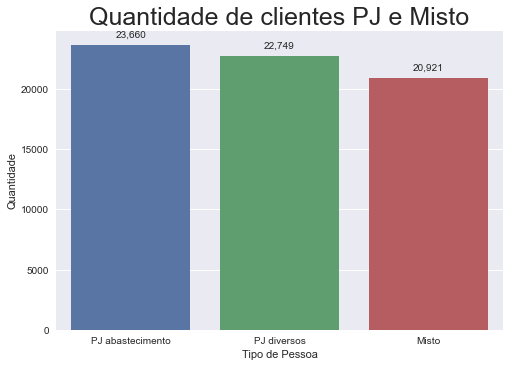

In [7]:
df.filter
df = df.sort_values('Quantidade', ascending=False).head(5)
chart = sns.barplot(x = 'Tipo de Pessoa', y='Quantidade',data=df[df["Tipo de Pessoa"] != "PF"])
chart.set_xticklabels(chart.get_xticklabels())
for p in chart.patches:
    chart.annotate("{:,.0f}".format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
chart.set_title("Quantidade de clientes PJ e Misto", fontsize = 25)

plt.savefig("Quantidade de clientes PJ e Misto.png", transparent = True)

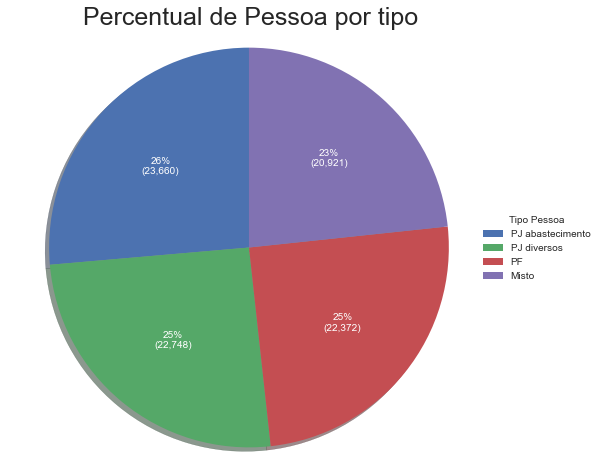

In [8]:
v_all = df['Quantidade']

def func(pct, v_all):
# calc %
    perc = int(pct/100.*np.sum(v_all))
# formatando
    return "{:.0f}%\n({:5,.0f})".format(pct, perc)

df.plot.pie(x = "Tipo de Pessoa", y = "Quantidade", autopct=lambda pct: func(pct, v_all), shadow = True, startangle = 90, figsize = (8, 8), textprops = dict(color="w"), labels = df["Tipo de Pessoa"]);

plt.legend(title="Tipo Pessoa",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.xlabel("")
plt.ylabel("")
plt.title("Percentual de Pessoa por tipo", fontsize = 25);
plt.axis("equal")
plt.savefig("Percentual de Pessoa por tipo.png", transparent = True)


In [9]:
df1 = dados

df1["Tipo de Pessoa"] = df1["Tipo de Pessoa"].map({"Misto":"Empreendedor",
                             "PJ abastecimento":"Empreendedor",
                             "PJ diversos":"Empreendedor",
                             "PF":"PF"},
                             na_action=None)

df1 = dados.groupby("Tipo de Pessoa")["Quantidade"].sum().reset_index()

df1

,Tipo de Pessoa,Quantidade
0,Empreendedor,67330
1,PF,22372


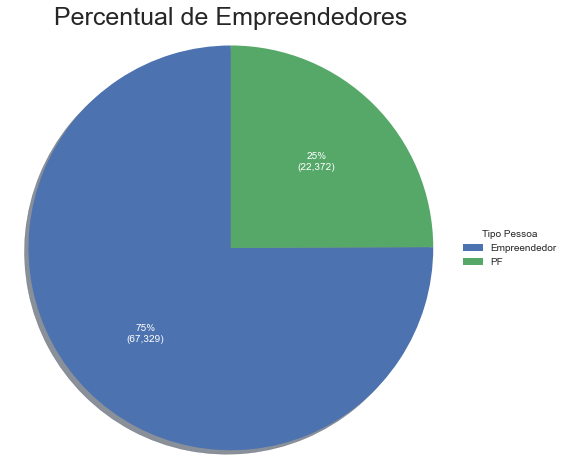

In [10]:
v_all = df1['Quantidade']

def func(pct, v_all):
# calc %
    perc = int(pct/100.*np.sum(v_all))
# formatando
    return "{:.0f}%\n({:5,.0f})".format(pct, perc)

df1.plot.pie(x = "Tipo de Pessoa", y = "Quantidade", autopct=lambda pct: func(pct, v_all), shadow = True, startangle = 90, figsize = (8, 8), textprops = dict(color="w"), labels = df1["Tipo de Pessoa"]);

plt.legend(title="Tipo Pessoa",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.xlabel("")
plt.ylabel("")
plt.title("Percentual de Empreendedores", fontsize = 25);
plt.axis("equal")
plt.savefig("Percentual de Empreendedores.png", transparent = True)
